### **Installing the Chemaxon Python module**

Install guide: https://docs.chemaxon.com/display/docs/python-api_installation.md

In [1]:
import sys

!{sys.executable} -m pip install chemaxon

  Using cached chemaxon-25.1.0b5-cp313-cp313-macosx_14_0_arm64.whl.metadata (1.9 kB)
Using cached chemaxon-25.1.0b5-cp313-cp313-macosx_14_0_arm64.whl (57.6 MB)


### **Version numbers and build date**

In [2]:
import chemaxon

print('Version:       ', chemaxon.__version__)
print('CCL version:   ', chemaxon.ccl_version())
print('CCL build date:', chemaxon.ccl_build_date())

Version:        25.1.0b5
CCL version:    25.1.3
CCL build date: 2025-04-24


### **Checking the details of the installed Python API license**

In [3]:
[lic for lic in chemaxon.licenses() if lic['product'] == 'Python API']

[{'product': 'Python API',
  'expiration': '2025-06-30',
  'licensee': 'Chemaxon',
  'state': 'VALID'}]

### **Molecule import / export**

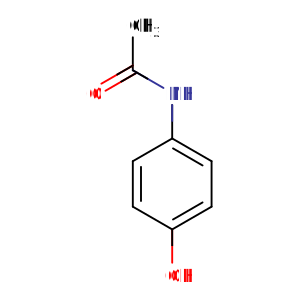

In [4]:
from chemaxon import import_mol, export_mol
mol = import_mol('CC(=O)NC1=CC=C(O)C=C1')
mol

In [5]:
print(export_mol(mol, 'smiles:u'))

CC(=O)Nc1ccc(O)cc1


In [6]:
print(export_mol(mol, 'smiles:+H'))

[H]OC1=C([H])C([H])=C(N([H])C(=O)C([H])([H])[H])C([H])=C1[H]


In [7]:
print(export_mol(mol, 'mol'))


  Mrv2501 05282522412D            

 11 11  0  0  0  0            999 V2000
    0.0000    3.3000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    2.4750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7145    2.0625    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    2.0625    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    1.2375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -1.2375    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  2  4  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  2  0  0  0  0
  6  7  1  0  0  0  0
  7  8  2  0  0  0  0

### **Reading multiple molecules from file**

In [8]:
from chemaxon import MolImporter

with MolImporter('nci1000.smiles') as mol_iterator:
    mols = list(mol_iterator)

len(mols)

1000

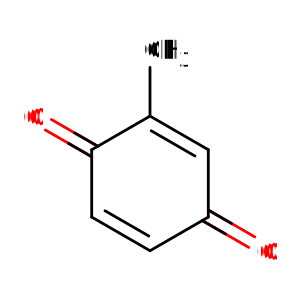

In [9]:
mols[0]

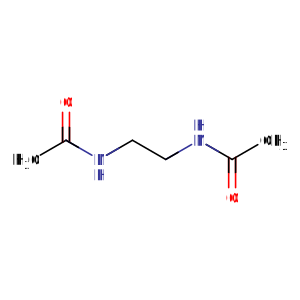

In [10]:
mols[598]